In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 統計モデル

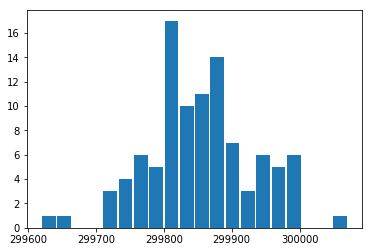

In [3]:
dat = pd.read_csv('data/morley.csv').values.ravel()  # データ読み込みee
plt.hist(dat, bins=20, rwidth=0.9)              # プロット
plt.show()

# 最尤推定量の計算法

In [4]:
x = np.random.uniform(size=10)  # データ数 10
np.max(x)                       # 最尤推定

0.93066414588786583

In [5]:
x = np.random.uniform(size=100) # データ数 100
np.max(x)                       # 最尤推定

0.99811663400288486

In [6]:
n = 10                                # データ数
x = np.random.uniform(size=n)         # データ生成
((n+1)/n) * np.max(x)                 # 不偏推定量

0.97199399621437177

In [7]:
X = np.random.rand(100,n)             # 100セットのデータを生成
X.shape

(100, 10)

In [8]:
# 最尤推定の平均値
# np.amaxで行列Xの各行(axis=1)にmaxを適用．それらの平均値を求める．
np.mean(np.amax(X,axis=1)) 

0.90292649418091808

In [9]:
# 不偏推定の平均値
np.mean((n+1)/n * np.amax(X,axis=1))

0.99321914359900998

In [10]:
df = pd.DataFrame(X)     # データフレームを作る

In [11]:
np.mean(df.apply(np.max, axis=1))                     # 最尤推定の平均値

0.90292649418091808

In [12]:
np.mean(df.apply(lambda x:(n+1)/n*np.max(x), axis=1)) # 不偏推定の平均値

0.99321914359900998

In [14]:
# 表現型から遺伝子型の比率を推定
from common import bloodtype as bt
n = np.array([40,30,10,20])     # 例．A:40人，B:30人，AB:10人，O: 20人
bt.mle(n)                       # 最尤推定値の計算

Optimization terminated successfully.
         Current function value: 128.937985
         Iterations: 29
         Function evaluations: 55


array([ 0.29787785,  0.22930651,  0.47281564])

# 混合モデルとEMアルゴリズム

In [19]:
# EMmixBernoulli 関数を読込み
from common.statmodelEMalg import EMmixBernoulli
a = pd.read_csv('data/optdigits_train.csv')     # データ読込み
x = a.values[:,0:64]>8   # 16段階調の8以下を0とし，9以上を1に変換
x.shape                  # 3823サンプル64次元データ

(3822, 64)

In [20]:
y = a.values[:,64]       # 各画像データのラベル．混合モデルの推定には使わない
# 混合ベルヌーイ分布でデータの分布を推定
p,q,BIC,gmm = EMmixBernoulli(x,K=10)   # コンポーネント数は10
ec = gmm.argmax(axis=0)                # 各データが属するコンポーネント

In [21]:
# 第1コンポーネント(インデックスは0)に属すデータのラベルを表示
u,c = np.unique(y[ec==0], return_counts=True)
np.c_[u,c].T

array([[  0,   1,   2,   3,   4,   5,   8,   9],
       [  6,  10,  12, 351,   1, 183,  78, 255]])

In [22]:
# 第3コンポーネント(インデックスは2)に属すデータのラベルを表示 
u,c = np.unique(y[ec==2], return_counts=True)
np.c_[u,c].T

array([[  1,   3,   4,   6,   7,   8,   9],
       [175,   1,  10,   1,   3,   1,   6]])

In [23]:
# コンポーネント数5で推定
p,q,BIC,gmm = EMmixBernoulli(x,K=5)
ec = gmm.argmax(axis=0)
# 第3コンポーネントに属すデータのラベルを表示 
u,c = np.unique(y[ec==2], return_counts=True)
np.c_[u,c].T

array([[  0,   1,   3,   4,   5,   6,   7,   8,   9],
       [  5, 177,   1, 318,  11,   2,   6,   8,  55]])

In [24]:
BIC

81362.726296528912

In [25]:
# コンポーネント数の候補
Klist = np.arange(4,51,2)
BIClist = np.array([])
for K in Klist:
    if K%10==0:  #途中経過表示
        print('K=',K)
    p,q,BIC,gmm = EMmixBernoulli(x,K=K)
    BIClist = np.append(BIClist,BIC)   

K= 10
K= 20
K= 30
K= 40
K= 50


In [26]:
Klist[np.argmin(BIClist)]  # BICが最小のコンポーネント数

20

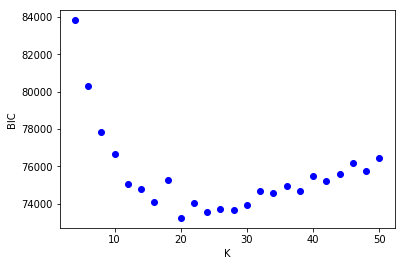

In [27]:
# プロット
plt.xlabel("K")
plt.ylabel("BIC")    
plt.plot(Klist,BIClist,'o',color='b')
plt.show()